# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 11__

__Nombres de los estudiantes: Jorge del Valle y Arturo Ibañez__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [1]:
import pandas as pd
filename='countries_of_the_world.csv'

In [2]:
df = pd.read_csv(filename)
df = df.set_index('Country')
del(df['Region'])
df=df.dropna(axis='rows',how='any')
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
Argentina,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
Armenia,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
Aruba,71891,193,372.5,35.49,0.00,5.89,28000.0,97.0,516.1,10.53,0.00,89.47,2.0,11.03,6.68,0.004,0.333,0.663
Australia,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700


## COMENTARIO
### Tras eliminar una columna y aquellas filas con alguna variable con valor indefinido, obtenemos un dataframe que consta de 179 paises y 18 variables

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
column_names = ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry', 'Service']
dff=df.loc[:, column_names]
dff

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380
Albania,4500.0,86.5,71.2,0.232,0.188,0.579
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743
Argentina,11200.0,97.1,220.4,0.095,0.358,0.547
Armenia,3500.0,98.6,195.7,0.239,0.343,0.418
Aruba,28000.0,97.0,516.1,0.004,0.333,0.663
Australia,29000.0,100.0,565.5,0.038,0.262,0.700


## Comentarios 
### Las columnas representan por orden:
    -El pib per capita
    -El porcentaje de poblacion alfabeta
    -La cantidad de telefonos por cada mil habitantes
    -Las tres ultimas columnas representan en una escala de 0 a 1 la correspondencia de los sectores primario, secundario
      y terciario con el PIB 

In [4]:
dff.describe(include='all')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


## Comentarios sobre las distribuciones
### El Pib per capita abarca un rango muy amplio que refleja la enorme diferencia de riqueza entre los distintos paises, tiene una media razonable teniendo en cuenta los sueldos minimos habituales en torno a los 800 dollares mensuales. Tambien observamos que el gran gruseo de paises tiene sueldos bajos
### Respecto a la poblacion alfabeta la gran mayoria de paises tienen un porcentaje en torno al 90% o superior. Observando el cuantil del 25% observamos que son pocos los países con bajo nivel de alfabetizacion, pero estos tienen niveles considerablemente bajos que hacen de la media un valor poco representivo, por lo comentado antes.
### Respecto a los moviles, los datos reflejan comportamientos similares al PIB per capita. Encontramos paises donde apenas hay posesion de telefonos, la media se baraja.
### En cuanto a los distintos sectores, contemplan rangos desde 0 hasta 0.76 para la agricultura y casi 1 en los otros dos. Esto refleja como hay paises completamente dedicados a la industria (Qatar) y otros a los servicios( por ejemplo Bahamas 0.9 centrada en el turismo); no se cumple lo mismo con la agricultura pues en la epoca actual no es planteable vivir solo de ella.

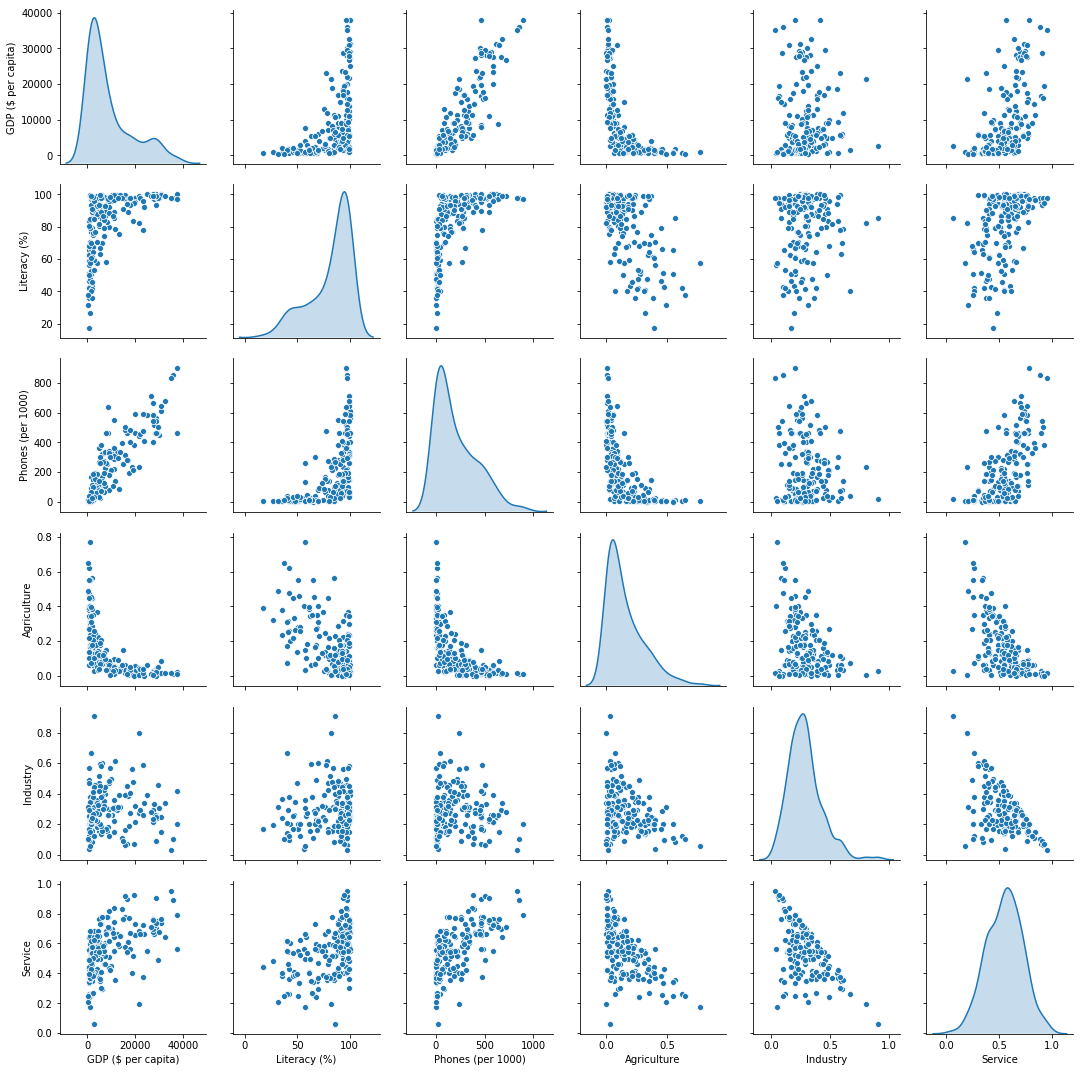

In [16]:
import seaborn as sns

sns.pairplot(dff, diag_kind='kde')

## Comentarios sobre las relaciones
### El PIB per capita esta fuertemente relacionado con la cantidad de telefonos, además también ocurre que la relación de estas dos variables con las otras son similares
### El nivel de alfabetizacion no esta relacionado con el PIB per capita ni con los telefonos
### La importancia del sector primario (agricultura, ganaderia) no esta relacionado con el PIB per capita ni con los telefonos
### La importancia del sector secundario (industria) esta levemente relacionado con el PIB per capita ni con los telefonos
### La importancia del sector primario (agricultura, ganaderia)  esta  relacionado con el PIB per capita ni con los telefonos
### El sector primario si presenta relacion con el nivel de alfabetizacion, nivel que tiende a ser bajo en paises centrados en la agricultura
### Los sectores secundario no esta relacionado con el nivel de alfabetizacion, y el terciario muy levemente.

### Respecto a la relacion de los niveles de importancia de los distintos sectores hay que tener en cuenta que dichas variables estan relacionadas de por si por la propia definicion de que la sum de los tres es uno. En las graficas se refleja esto; pero no se aprecia una relacion directa entre dos variables, puesto que como hemos comentado tratamos una relacion ternaria, que abarca gran cantidad de posibles combinaciones. Esto que comentamos se aprecia en la forma de triangulo que representan los valores, matecmaticamente el conjunto convexo que abarca las  posibles combinaciones.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

### Necesitamos escalar los valores puesto que tres variables toman valores de 0 a 1 y el pib lo hace de 500 a 35000. Por esto nos interesa usar MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución

scaler = MinMaxScaler()
scaler.fit(dff.values)
valores_orig=dff.values
values_scaled = scaler.transform(dff.values)
values_scaled

array([[0.00536193, 0.22330097, 0.0033415 , 0.49414824, 0.23798627,
        0.35650224],
       [0.10723861, 0.83616505, 0.0790822 , 0.30169051, 0.1784897 ,
        0.57959641],
       [0.14745308, 0.63592233, 0.08676765, 0.1313394 , 0.64988558,
        0.26457399],
       ...,
       [0.0080429 , 0.39563107, 0.04121185, 0.17555267, 0.50343249,
        0.37107623],
       [0.0080429 , 0.76456311, 0.00891067, 0.28608583, 0.29519451,
        0.47869955],
       [0.03753351, 0.88713592, 0.02962798, 0.23276983, 0.24141876,
        0.57959641]])

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [8]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans

RANDOM_STATE=333
K_MAX = 11
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(values_scaled)
    
    score[k-2] = -1 * km.score(values_scaled)
    davies_boulding[k-2] = davies_bouldin_score(values_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(values_scaled, km.labels_)

c:\software\programacion\python\anaconda2\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


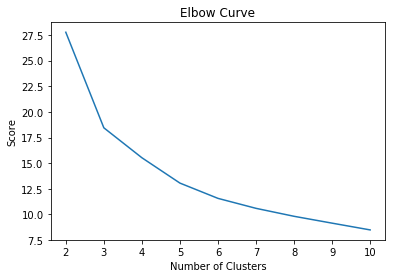

In [9]:
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

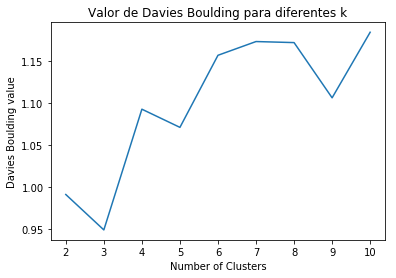

In [10]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

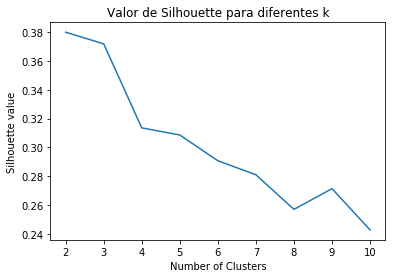

In [11]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

### Cuantos Clusters?
### En el diagrama del codo buscamos un valor de K en el que la curva deja de descender tan rápidamente. En este caso podemos ver que K=3 es una buena elección .
### El mejor valor de Davies–Bouldin (el más pequeño) se obtiene también para K = 3.
### El mejor valor de Silhouette (el más grande) se obtiene también para K=2.

### En este caso las 2 métricas nos dan el mismo resultado K = 3. La tercera da  como valor de k= 2; pero sucede que la diferencia de los valores de Silhouette entre K = 2 y K =3 es suficientemente pequeña como para considerar el valor de K= 3 bueno. 

# Segun nuestro criterio, el número óptimo de clusters es 3

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [12]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(values_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=333, tol=0.0001, verbose=0)

In [13]:
# crear data frame con los puntos originales
ndf = pd.DataFrame(data=valores_orig, columns=column_names)
# añadir una columna con el cluster al que pertenece cada punto
ndf = ndf.assign(cluster=pd.Series(data=km.labels_))
ndf

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
0,700.0,36.0,3.2,0.380,0.240,0.380,0
1,4500.0,86.5,71.2,0.232,0.188,0.579,2
2,6000.0,70.0,78.1,0.101,0.600,0.298,2
3,8600.0,95.0,460.0,0.040,0.180,0.780,1
4,11000.0,89.0,549.9,0.038,0.220,0.743,1
5,11200.0,97.1,220.4,0.095,0.358,0.547,2
6,3500.0,98.6,195.7,0.239,0.343,0.418,2
7,28000.0,97.0,516.1,0.004,0.333,0.663,1
8,29000.0,100.0,565.5,0.038,0.262,0.700,1
9,30000.0,98.0,452.2,0.018,0.304,0.678,1


In [14]:
ndf.groupby(["cluster"]).describe().transpose()

cluster                             0             1             2
GDP ($ per capita) count    47.000000     40.000000     92.000000
                   mean   1480.851064  24092.500000   6523.913043
                   std     816.311508   7732.893030   4524.690981
                   min     500.000000   8600.000000    700.000000
                   25%     800.000000  17950.000000   3275.000000
                   50%    1300.000000  25900.000000   5450.000000
                   75%    1850.000000  29025.000000   9000.000000
                   max    4100.000000  37800.000000  21500.000000
Literacy (%)       count    47.000000     40.000000     92.000000
                   mean     53.589362     96.915000     89.920652
                   std      14.501683      3.872821      8.884504
                   min      17.600000     77.900000     58.000000
                   25%      42.300000     96.550000     85.025000
                   50%      52.900000     97.950000     92.250000
                   75%      65.950000     99.000000     97.350000
                   max      85.300000    100.000000     99.900000
Phones (per 1000)  count    47.000000     40.000000     92.000000
                   mean     17.148936    530.172500    165.720652
                   std      23.621378    138.167347    107.955035
                   min       0.200000    194.500000      3.700000
                   25%       3.600000    458.375000     75.075000
                   50%       9.700000    493.300000    141.500000
                   75%      19.550000    590.025000    260.525000
                   max     131.800000    898.000000    463.800000
Agriculture        count    47.000000     40.000000     92.000000
                   mean      0.340723      0.027450      0.119283
                   std       0.149452      0.019916      0.084219
                   min       0.073000      0.000000      0.002000
                   25%       0.243500      0.010750      0.058000
                   50%       0.322000      0.021500      0.099500
                   75%       0.424500      0.040000      0.164000
                   max       0.769000      0.086000      0.370000
Industry           count    47.000000     40.000000     92.000000
                   mean      0.232468      0.245600      0.334859
                   std       0.118078      0.115622      0.145356
                   min       0.040000      0.032000      0.088000
                   25%       0.167500      0.175000      0.229750
                   50%       0.204000      0.252000      0.311000
                   75%       0.281500      0.298000      0.412250
                   max       0.666000      0.585000      0.906000
Service            count    47.000000     40.000000     92.000000
                   mean      0.426936      0.726675      0.544826
                   std       0.124527      0.119561      0.134877
                   min       0.177000      0.375000      0.062000
                   25%       0.351500      0.671000      0.445000
                   50%       0.406000      0.729000      0.551500
                   75%       0.542000      0.780000      0.640750
                   max       0.643000      0.954000      0.818000

c:\software\programacion\python\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\software\programacion\python\anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


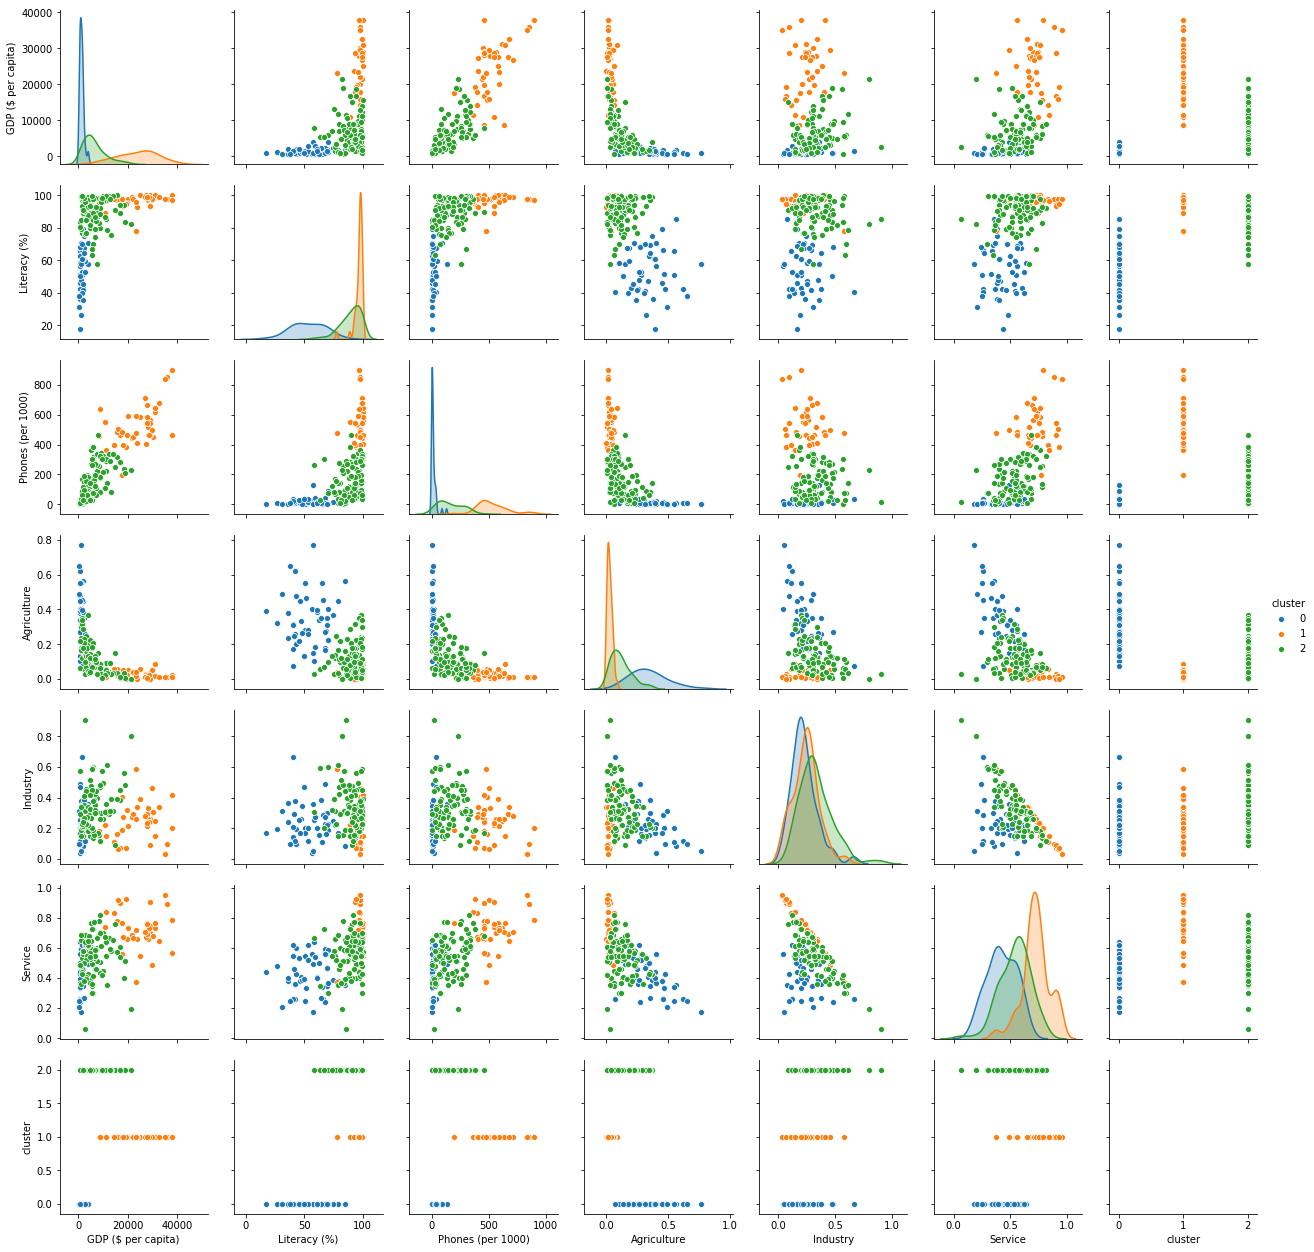

In [15]:
sns.pairplot(ndf, diag_kind='kde',hue='cluster')

### Comentarios
### Ideo de que representa cada cluster:

### Cluster 0(azul): (primer mundo) pais desarrollado con predominacion de sector servicios y con poca agricultura, mayor pib per capita,casi el total de la poblacion es alfabeta y en su mayoria poseen telefonos.


### Cluster 1(naranja):(segundo mundo) pais en desarrollo que todavia tiene una economia con gran peso en industria y agricultura , aunque ya dedicada en gran parte al sector servicios. Los sueldos medios son inferiores a los del cluster 0, pero todavia decentes, el grueso de la poblacion es alfabeta y solo algunos poseen telefonos.


### Cluster 2(verde):(tercer mundo) pais subdesarrollado y poco industrializado, donde el grueso de la  poblacion dse dedica a la agricultura, es analfabeta, tiene pocos ingresos, y por ello casi nadie hace uso de telefonos. Dentro de estos paises encontramos una elite dedicada al sector servicios.

### Como el cluster 0 y 2 recogen los distintos extremos de la variables( el 1 recoge el termino medio) , son estos dos los que mejor se diferencian.
### La separacion por PIB per capita y telefonos es la mas clara. Tambien hay una diferencia apreciable desde el punto de vista de la agricultura, los servicios y la poblacion alfabetizada. La confusion mas evidente se observa en la industria
